In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
diabetes_df = pd.read_csv('diabetes_prediction_dataset.csv')

## Exploration of Data

In [3]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes_df.info() #Displays the information of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
diabetes_df.describe() #Gives statistical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
diabetes_df.isnull().sum() #checks for missing/null values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
diabetes_df.duplicated().sum() #checks for duplicate values

3854

In [8]:
#Encode categorical variables (gender, smoknig history)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = ['gender', 'smoking_history']
for column in categorical_columns:
    diabetes_df[column] = LabelEncoder().fit_transform(diabetes_df[column])

In [9]:
#TODO Find/show anomalies (we have to find which columns to investigate or investigate all of them)

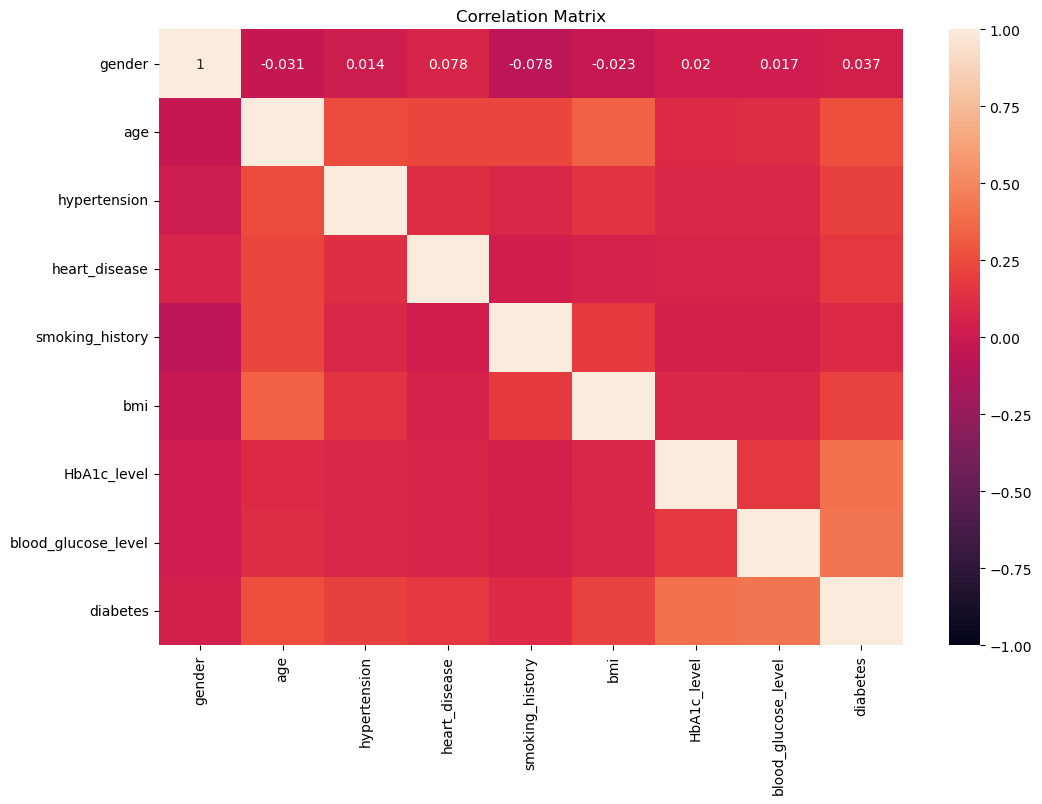

In [10]:
#Correlation Matrxi
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_df.corr()
sb.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

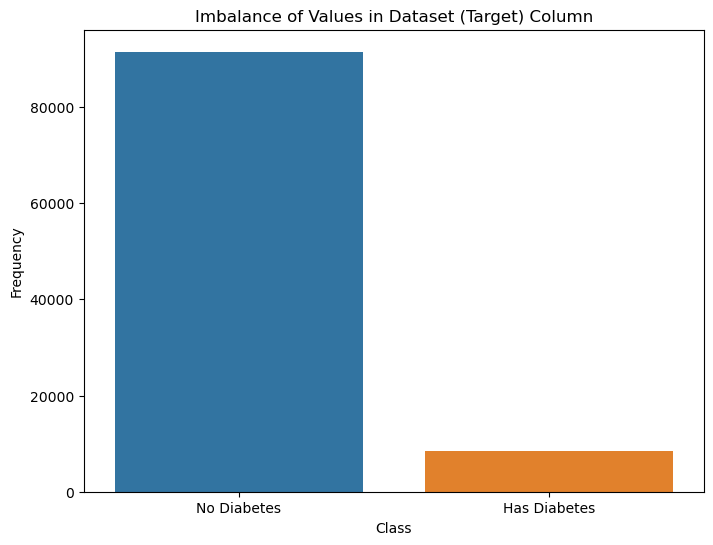

In [11]:
#Display class imbalance

#grab counts
counts = diabetes_df[diabetes_df.columns[-1]].value_counts()

# Plot the imbalance
plt.figure(figsize=(8, 6))
sb.barplot(x=counts.index, y=counts.values)
plt.title('Imbalance of Values in Dataset (Target) Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Has Diabetes'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

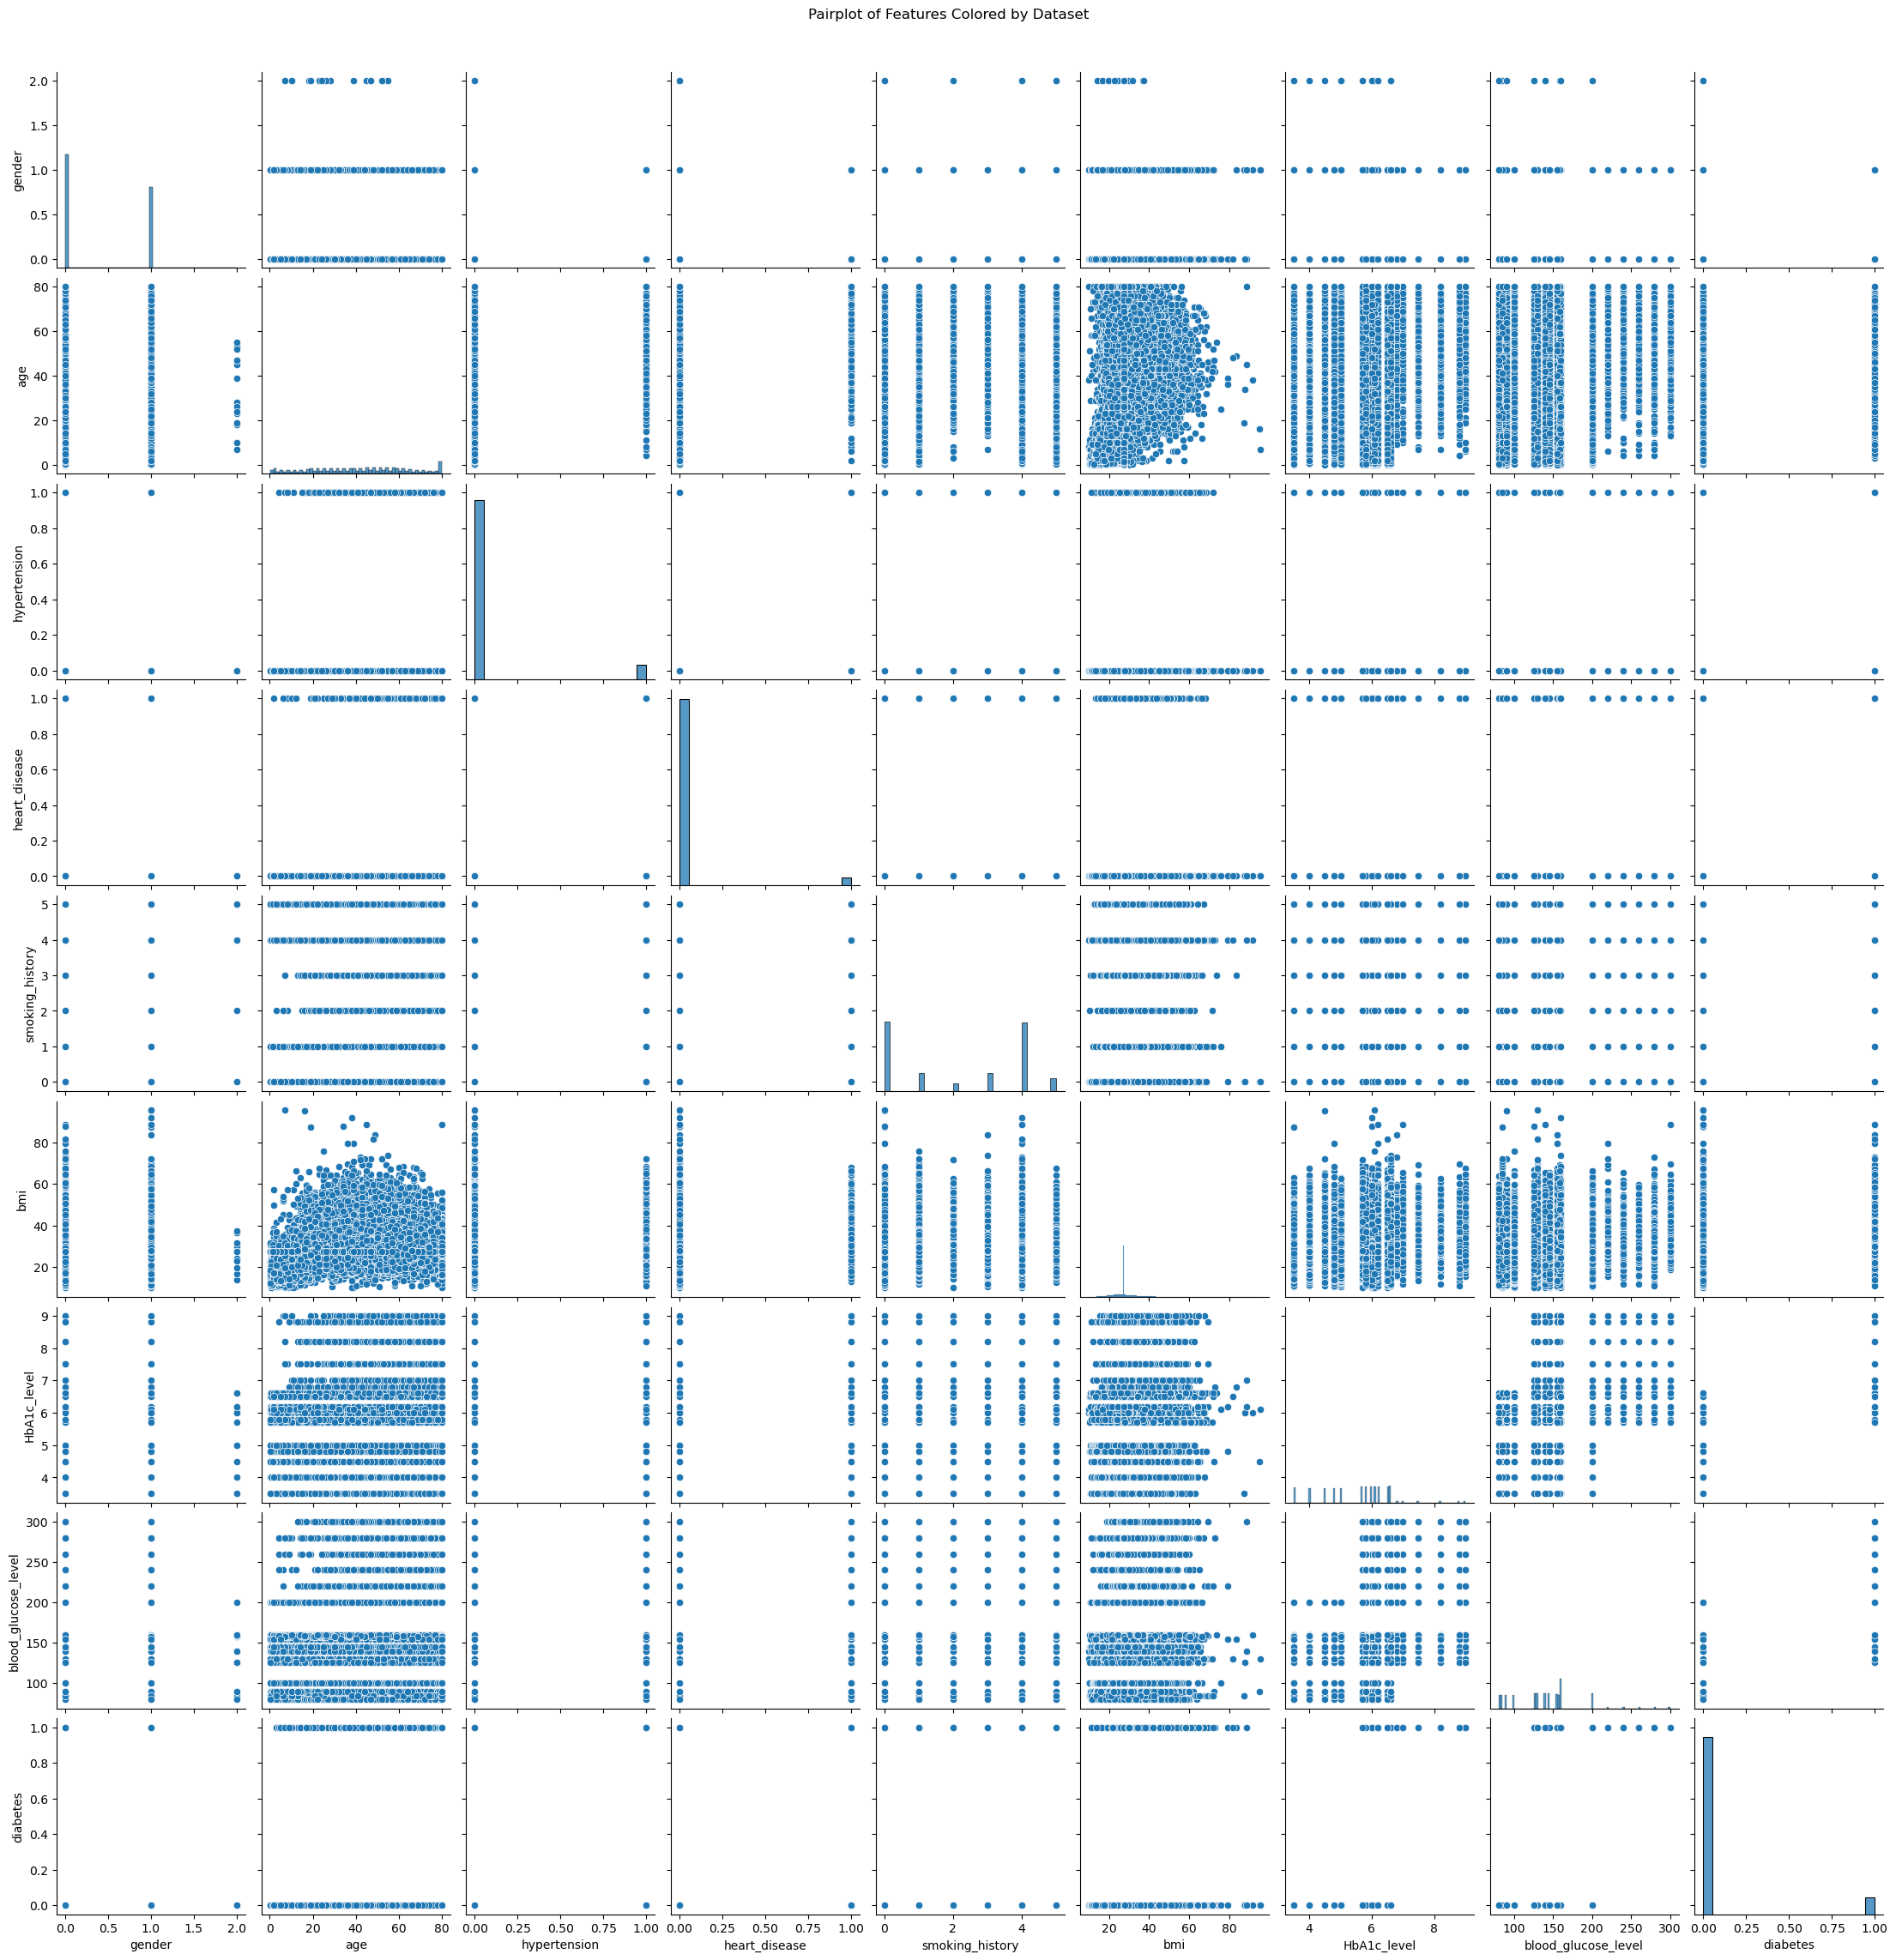

In [12]:
#Explore the data using visualization TODO add more visualizations

#Pairplot
sb.pairplot(diabetes_df)
plt.suptitle('Pairplot of Features Colored by Dataset', y=1.02)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

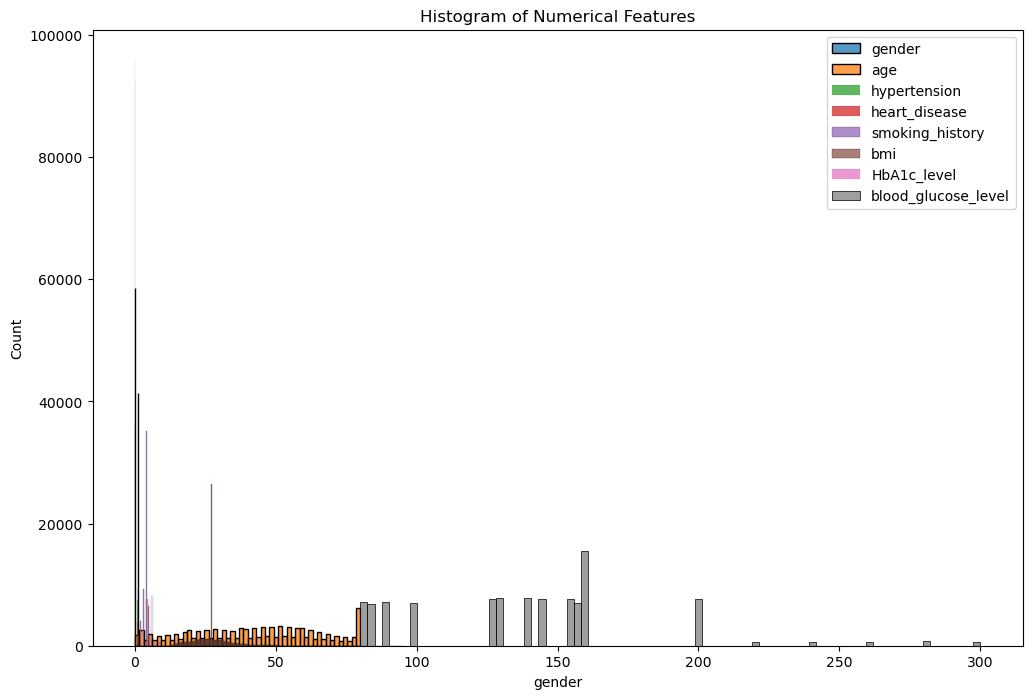

In [13]:
#histoplot
plt.figure(figsize=(12, 8))
for column in diabetes_df.columns[:-1]:  # Exclude the target column
    sb.histplot(diabetes_df[column], label=column)
plt.title('Histogram of Numerical Features')
plt.legend()
plt.show()

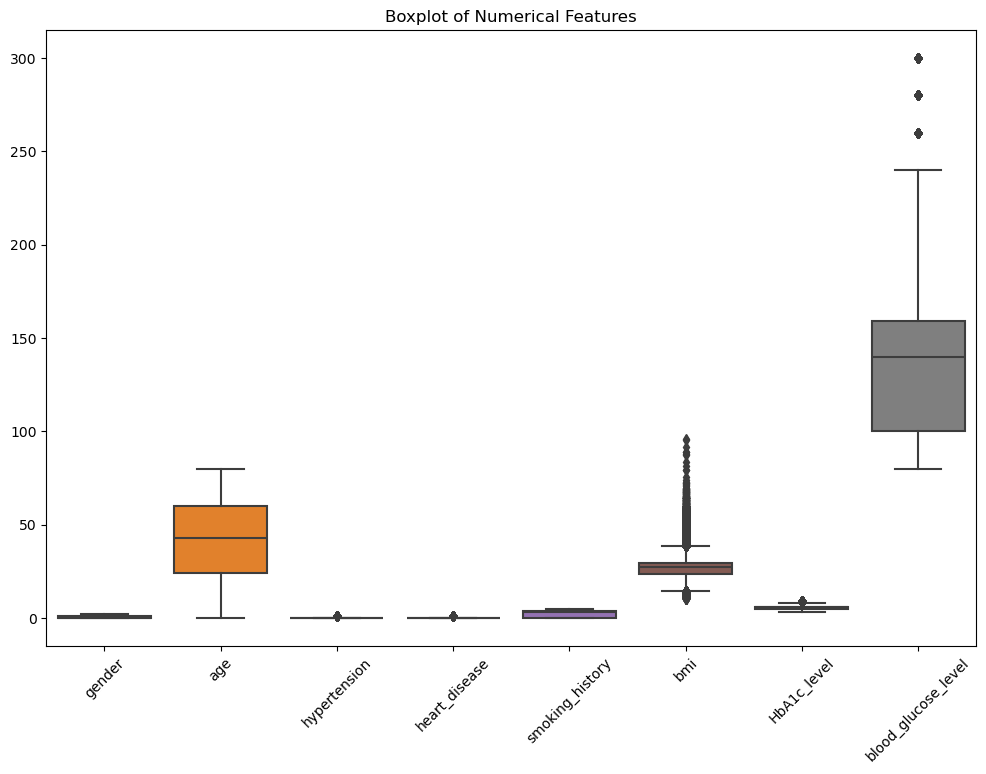

In [14]:
#Boxplot
plt.figure(figsize=(12, 8))
sb.boxplot(data=diabetes_df.drop(columns=['diabetes']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

## Preprocessing of Data

In [15]:
diabetes_df = diabetes_df.drop_duplicates(keep='first') # drops the duplicate entries in the data set

diabetes_df.duplicated().sum()

0

In [16]:
# This function checks for anomalies and outputs the number of each anomaly per category if there are anomalies.
#
# Parameters:
# - Dataset,          type=pandas.dataframe
# - Quantile list,    type=list of floats   (Optional, default=[0.25, 0.50, 0.75]) 
#
# Returns:
# - Anomaly presence, type=boolean

def check_anomalies(dataset, quantile_list=[0.25, 0.50, 0.75]):
    # The quantiles are loaded from the quantile list.
    low = quantile_list[0]
    mid = quantile_list[1]
    top = quantile_list[2]
    
    # The function assumes that there are no anomalies in the dataset until proven otherwise.
    anomaly_presence = False
    
    for category in dataset:
        # Checks if the current category contains exclusively numerical data.
        # If the first entry in a category is a string, then that category is skipped to prevent a value error.
        try:
            if (type(dataset[category][0]) is str):
                continue
        except:
            pass
        
        # Calculating the quantiles.
        Q1 = dataset[category].quantile(low)
        Q2 = dataset[category].quantile(mid)
        Q3 = dataset[category].quantile(top)
        IQR = Q3 - Q1

        # Calculating the bounds.
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Checking for anomalies.
        anomalies = dataset[(dataset[category] < lower_bound) | (dataset[category] > upper_bound)]
        if (anomalies.shape[0] > 1):
            anomaly_presence = True
            print("There are " + str(anomalies.shape[0]) + " " + category + " anomalies in this dataset.")
        elif (anomalies.shape[0] == 1):
            anomaly_presence = True
            print("There is " + str(anomalies.shape[0]) + " " + category + " anomaly in this dataset.")
    
    # If there is no anomaly in the dataset, the user is informed of the lack of anomalies.
    if (anomaly_presence == False):
        print("There are no anomalies in the dataset.  Hooray!")
        
    # The function returns whether it found anomalies.
    return anomaly_presence
        
# The anomalies for the diabetes dataset are checked using the defeault settings.
check_anomalies(diabetes_df)

There are 7461 hypertension anomalies in this dataset.
There are 3923 heart_disease anomalies in this dataset.
There are 5354 bmi anomalies in this dataset.
There are 1312 HbA1c_level anomalies in this dataset.
There are 2031 blood_glucose_level anomalies in this dataset.
There are 8482 diabetes anomalies in this dataset.


True

In [22]:
# This function removes anomalies from a dataset given a list of categories to check.
#
# Parameters:
# - Dataset,       type=pandas.dataframe
# - Categories,    type=list of strings
# - Quantile list, type=list of floats   (Optional, default=[0.25, 0.50, 0.75]) 
#
# Returns:
# - Dataset,    type=pandas.dataframe

def remove_anomalies(dataset, categories, quantile_list=[0.25, 0.50, 0.75]):
    # The quantiles are loaded from the quantile list.
    low = quantile_list[0]
    mid = quantile_list[1]
    top = quantile_list[2]
    
    # An empty dataset is initialized with the categories of the dataset.
    anomalies = pd.DataFrame(columns=categories)
    
    for category in categories:
        # Checks if the current category contains exclusively numerical data.
        # If the first entry in a category is a string, then that category is skipped to prevent a value error.
        try:
            if (type(dataset[category][0]) is str):
                continue
        except:
            pass
        
        # Calculating the quantiles.
        Q1 = dataset[category].quantile(0.25)
        Q2 = dataset[category].quantile(0.50)
        Q3 = dataset[category].quantile(0.75)
        IQR = Q3 - Q1

        # Calculating the bounds.
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Compiling the anomalies.
        current_anomaly = dataset[(dataset[category] < lower_bound) | (dataset[category] > upper_bound)]
        anomalies = pd.concat([anomalies, current_anomaly])
    
    # The anomalies are cleared of all duplicates.
    anomalies = anomalies.drop_duplicates()
    
    # The anomalies are removed from the dataset and returned for further use.
    dataset = dataset.drop(anomalies.index)
    
    return dataset

# This is an example on how to use the remove_anomalies function.  Note that this is commented out because I don't
# want to remove so many entries that it lobotomizes that models.
#
# The line of code below will remove all BMI anomalies from the diabetes dataframe.  Even if you want to remove
# anomalies from just one category, the category you want to remove must be in a list.
#remove_anomalies(diabetes_df, ["bmi"])

In [23]:
#splitting target from data
data = diabetes_df[diabetes_df.columns[:-1]]
target = diabetes_df[diabetes_df.columns[-1]]

In [24]:
from sklearn.preprocessing import StandardScaler 

# Initializes StandardScaler
scaler = StandardScaler()

# Fit and transform the data 
scaled_data = scaler.fit_transform(data)

In [25]:
#Balance classes with SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x,y = sm.fit_resample(scaled_data, target)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((140262, 8), (35066, 8), (140262,), (35066,))

## Training the Models

In [27]:
#Logistic regression
#Naives bayes
#KNN
#Random forest
#Decision tree
#Bagging
#AdaBoost
#XGBoost
#Voting
#SVM
#Neural Network
#Deep Neural Network

#Top Models we will run
#GridSearchCV
#RFE feature selection

### Standalone Models

In [28]:
#Logistic Regression - Vance
from sklearn.linear_model import LogisticRegression

Logistic_regression_model = LogisticRegression(random_state=42).fit(X_train, y_train)

pred_log_reg = Logistic_regression_model.predict(X_test)

In [29]:
#Naive Bayes - Jesus
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

pred_nb = nb_model.predict(X_test)

In [30]:
#KNN - Joshua

In [31]:
#Random Forest - Joshua

In [35]:
#SVM - Jesus 
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42, dual=False)  # `dual=False` is preferable for cases where n_samples > n_features.

svm_model.fit(X_train, y_train)

pred_svm = svm_model.predict(X_test)


In [36]:
#Decision Tree - Vance
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
decision_tree.fit(X_train,y_train)

pred_decision_tree = decision_tree.predict(X_test)

In [37]:
#Neural Network
#https://keras.io/examples/structured_data/structured_data_classification_with_feature_space/
import keras
from keras import layers
from keras import ops, models, optimizers
from keras.utils import FeatureSpace

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
input_shape = X_train.shape[1:]

simple_NN = models.Sequential(
    [
    layers.Input(shape=input_shape),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # For binary classification
    ]
)

simple_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
simple_NN.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Make predictions
pred_simple_NN = simple_NN.predict(X_test)

ModuleNotFoundError: No module named 'keras'

### Combination Models

In [38]:
#Bagging - 

In [39]:
#AdaBoost - 

In [40]:
#XGBoost - 

In [41]:
#Voting - 

## Comparing the Models

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, matthews_corrcoef

def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    mtc = matthews_corrcoef(y_test, y_pred)

    results = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'AUC': auc,
        #'Matthews Corr Coef': mtc,
    }

    return results

def evaluateNN():
    return None

def displayCM(y_pred):
    # Generate matrix
    cm = confusion_matrix(y_test, y_pred)
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Diabetes (1)', 'No Diabetes (0)'])
    disp.plot()
    plt.title('Confusion Matrix Tree')
    plt.show()

def displayResultsTable(modelResults):
    df = pd.DataFrame(modelResults).T
    print(df)

def findTopModel(modelResults, metricName):
    #find top model based on F1
    top_model = None
    top_score = 0
    for model_name, metrics in modelResults.items():
        if metrics[metricName] > top_score:
            top_score = metrics[metricName]
            top_model = model_name
    return top_model, top_score

In [43]:
logistic_regression = evaluate(pred_log_reg)

decision_tree = evaluate(pred_decision_tree)

#neural_network = evaluate(pred_simple_NN)

#deep_neural_network = evaluate(pred_deep_NN)

svm = evaluate(pred_svm)
naive_bayes = evaluate(pred_nb)


modelResults = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    #'Neural Network': neural_network,
    #'Deep Neural Network': deep_neural_network
    'SVM': svm,
    'Naive Bayes': naive_bayes
}

displayResultsTable(modelResults)

top_f1_model, top_f1_score = findTopModel(modelResults,'F1')
print()
print(f'The model with the highest F1 score is {top_f1_model} with a score of {top_f1_score:.4f}')

                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.885131   0.888921  0.881659  0.885275  0.885150
Decision Tree        0.846974   0.780047  0.968741  0.864214  0.846318
SVM                  0.885245   0.888457  0.882510  0.885474  0.885260
Naive Bayes          0.835025   0.882592  0.774891  0.825242  0.835350

The model with the highest F1 score is SVM with a score of 0.8855


## Feature Selection & GridSearchCV on the Top Models

## Recomparing the Models

## Final Observations